In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans

# Splitting data and model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [82]:
data = pd.read_csv('H:\Harsha\Study\Data Mining\Project\Electric_Vehicle_Population_Data.csv')

In [83]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [84]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [85]:
# Checking the data shape
shape_of_data = data.shape
print(shape_of_data)

(177866, 17)


In [86]:
# Null values checking
data.isna()
data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [87]:
# Duplicat values check
Checking_duplicate_values=data.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} values')

The data set contains the 0 values


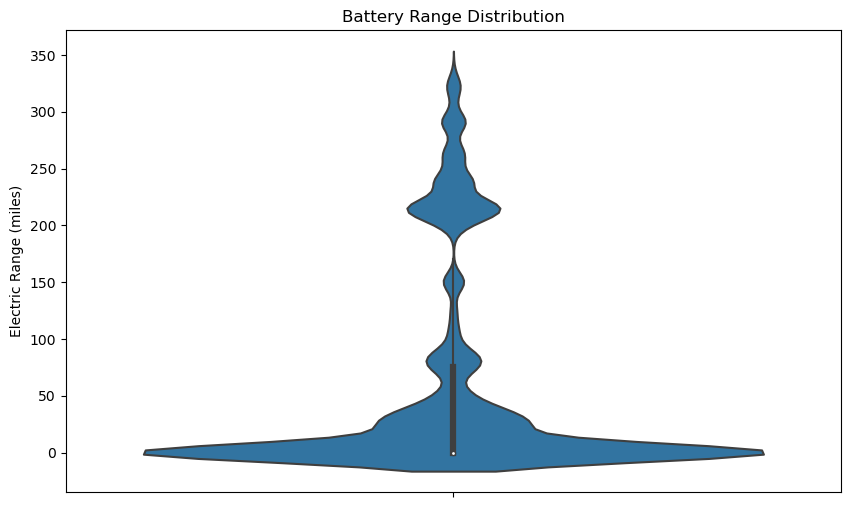

In [88]:
# Visualizing Battery Range using Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='Electric Range')
plt.title('Battery Range Distribution')
plt.ylabel('Electric Range (miles)')
plt.show()

In [89]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

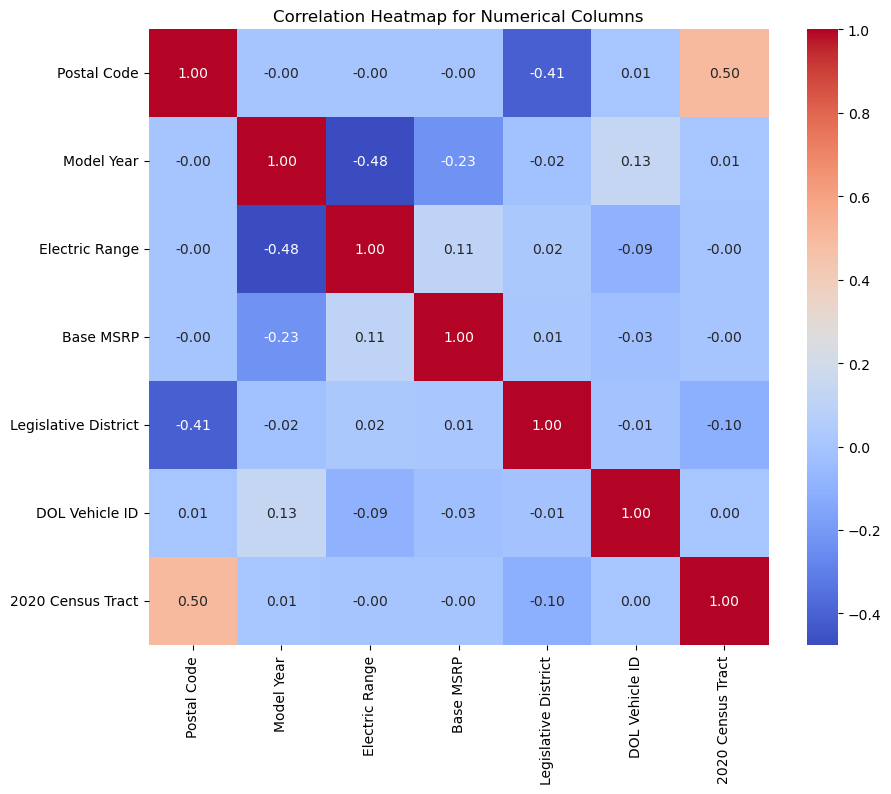

In [90]:
# Heatmap for Correlation with all numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [91]:
column_names = data.columns
print("Column names of EV DataFrame:", column_names)

Column names of EV DataFrame: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


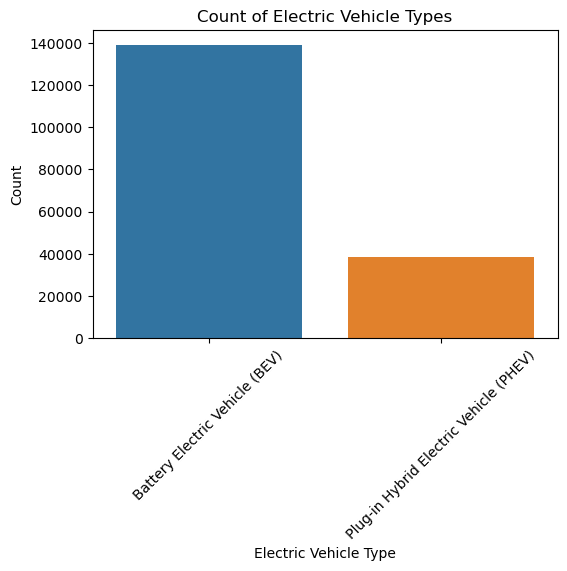

In [92]:
# Count of each Electric Vehicle Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Electric Vehicle Type', data=data)
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

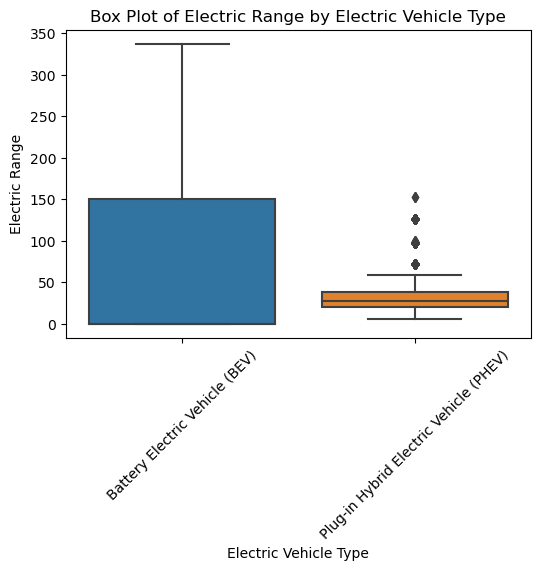

In [93]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.title('Box Plot of Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

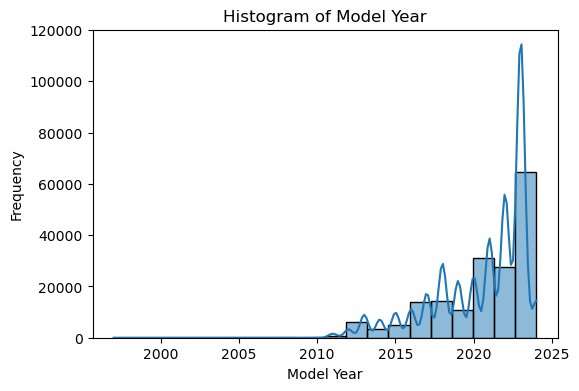

In [94]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Model Year'], bins=20, kde=True)
plt.title('Histogram of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

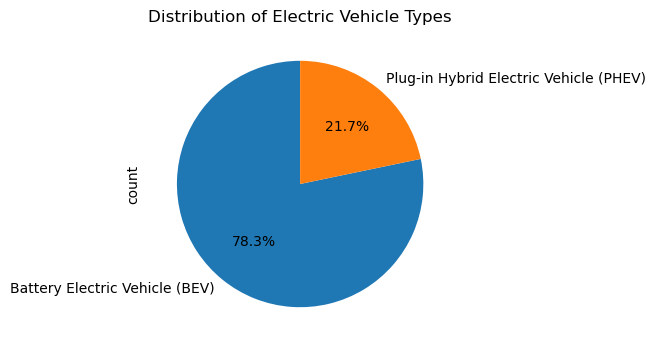

In [95]:
plt.figure(figsize=(4, 4))
data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

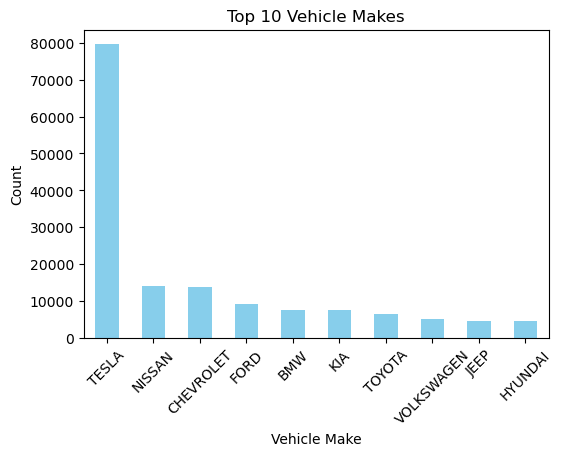

In [96]:
plt.figure(figsize=(6, 4))
top_makes = data['Make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [97]:
# Cleaning Null Values
data.dropna(inplace=True)

# Checking Duplicate Value
data.duplicated().sum()

# Removing Column
data['State'].value_counts()

# State column has only one value i.e WA means Washington D.C. So we can remove 'state' column
data.drop(columns='State',inplace=True)

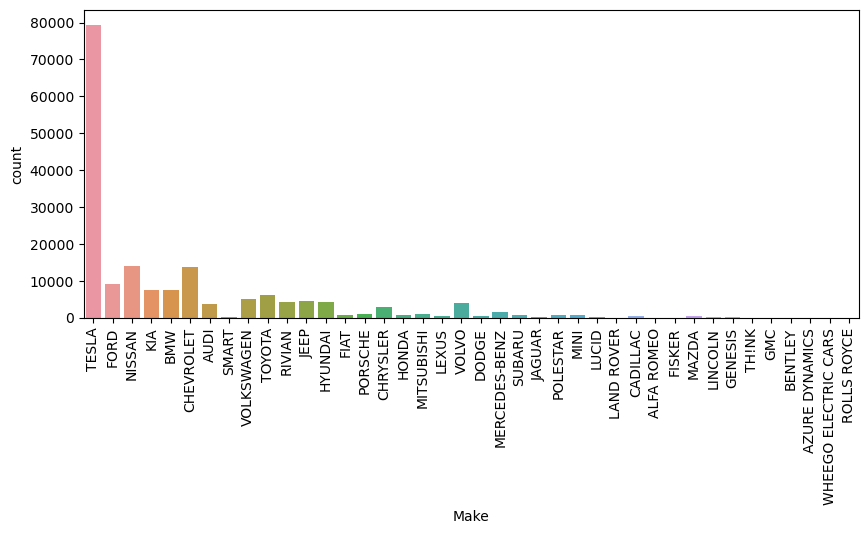

In [98]:
plt.figure(figsize=(10,4))
sns.countplot(x='Make',data=data)
plt.xticks(rotation=90);

<Axes: ylabel='count'>

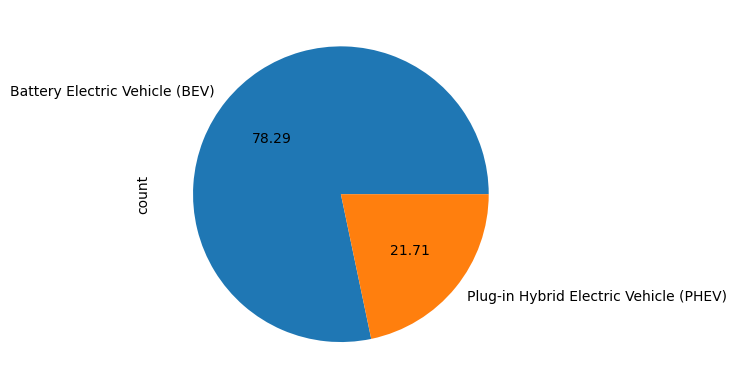

In [99]:
data['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

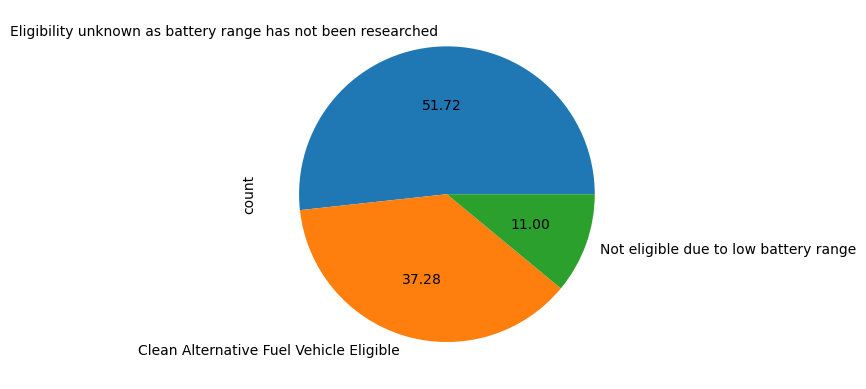

In [100]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

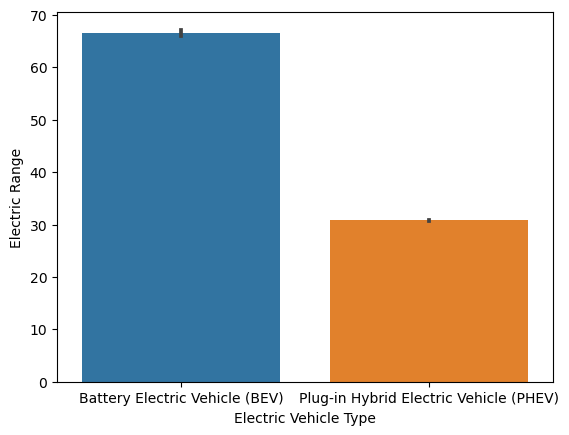

In [101]:
sns.barplot(x='Electric Vehicle Type',y='Electric Range',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

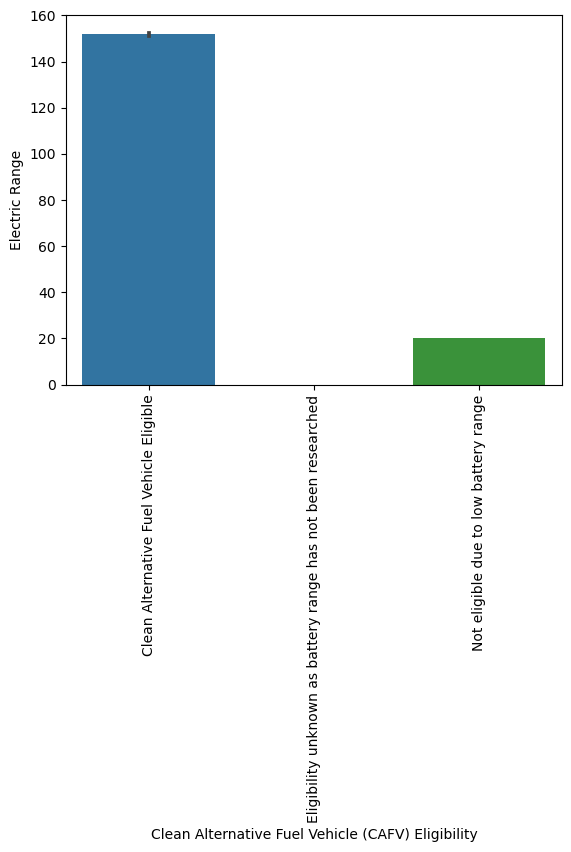

In [102]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range',data=data)
plt.xticks(rotation=90)

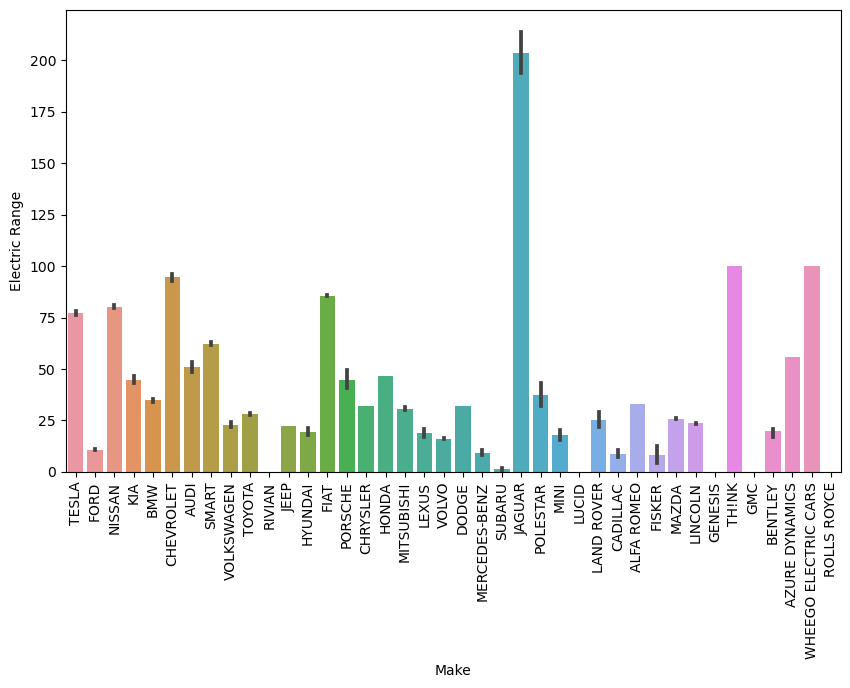

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make',y='Electric Range',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Model Year', ylabel='Electric Range'>

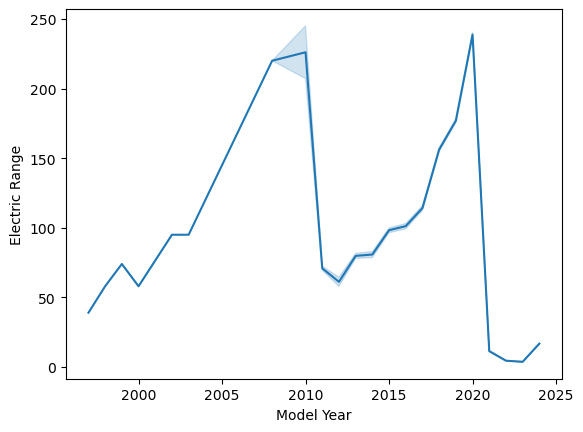

In [104]:
sns.lineplot(x='Model Year',y='Electric Range',data=data)

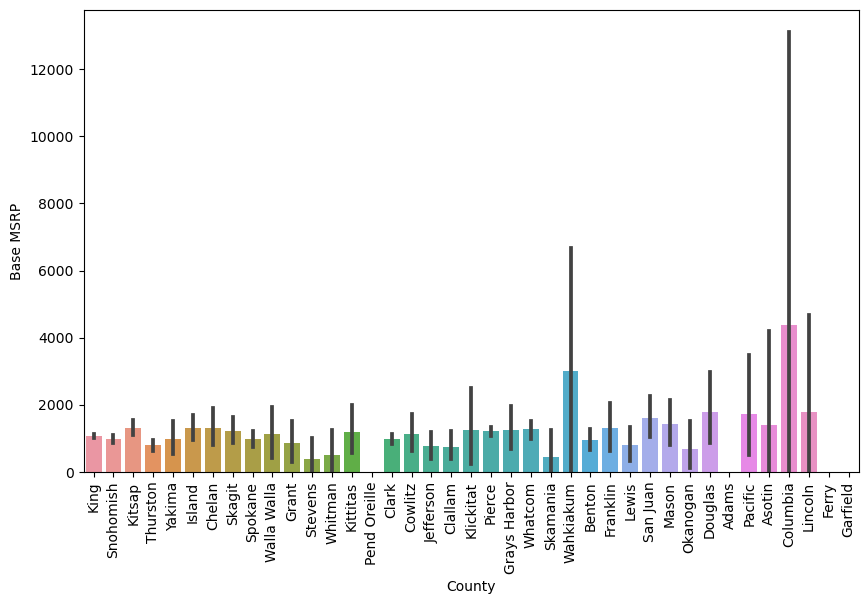

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Base MSRP',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

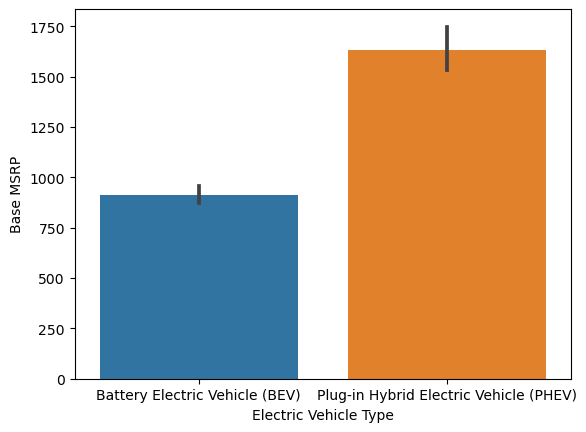

In [106]:
sns.barplot(x='Electric Vehicle Type',y='Base MSRP',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

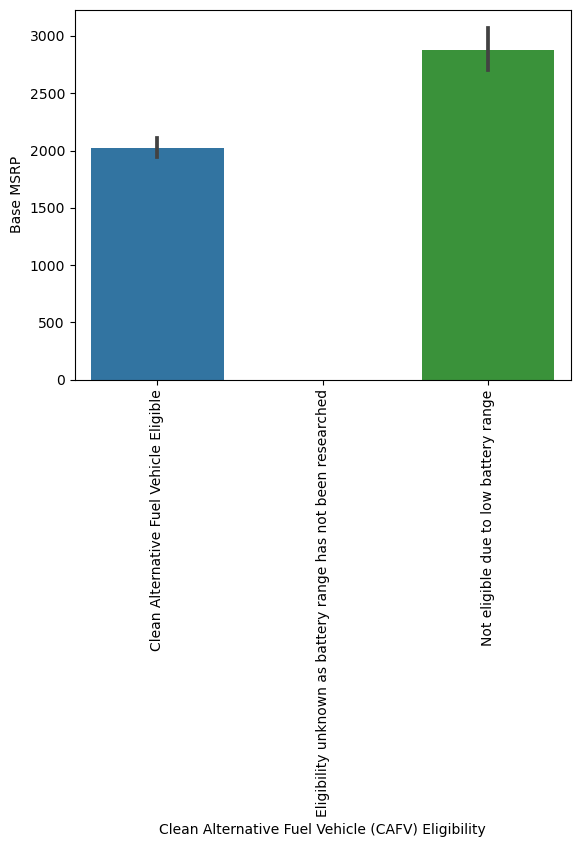

In [107]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP',data=data)
plt.xticks(rotation=90)

In [108]:
# Defining the response variable
response_variable = 'Electric Range'
print(f'The response variable is: {response_variable}')

The response variable is: Electric Range


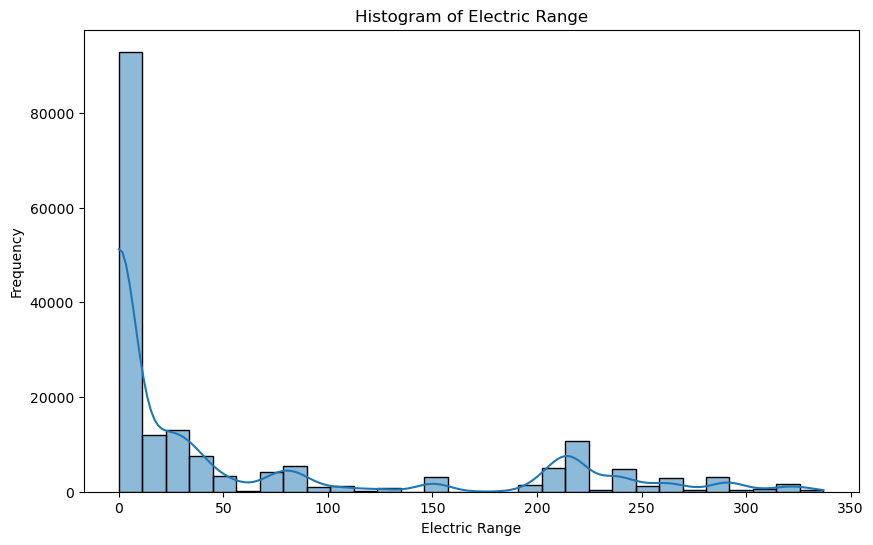

In [109]:
# Plotting histogram to determine the thresholds for Electric Range categories
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], bins=30, kde=True)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

In [110]:
# Research-based thresholds for Electric Range categories
low_threshold = 50
medium_threshold = 150

# Categorizing Electric Range into Low, Medium, High
bins = [0, low_threshold, medium_threshold, np.inf]
labels = ['Low', 'Medium', 'High']
data['Electric_Range_Category'] = pd.cut(data['Electric Range'], bins=bins, labels=labels)

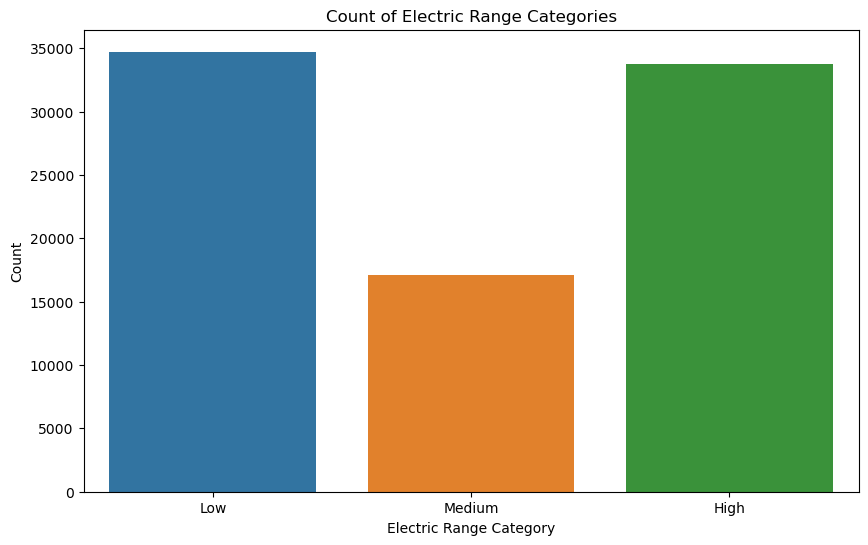

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric_Range_Category', data=data)
plt.title('Count of Electric Range Categories')
plt.xlabel('Electric Range Category')
plt.ylabel('Count')
plt.show()

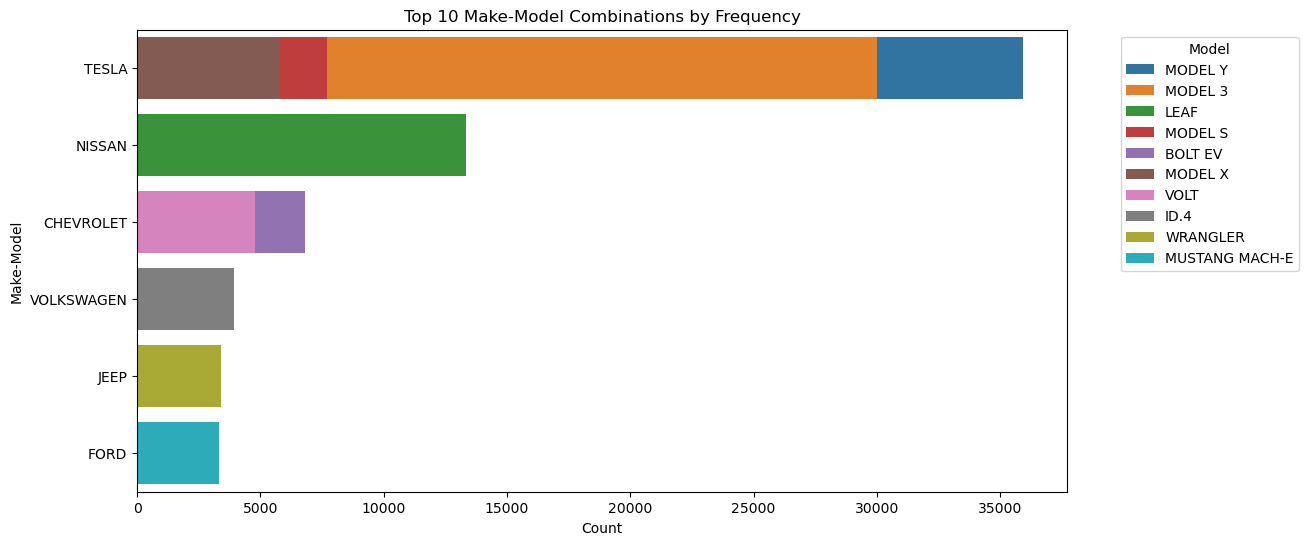

In [112]:
# Analyzing Make and Model per frequency
top_makes_models = data.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Make', hue='Model', data=top_makes_models, dodge=False)
plt.title('Top 10 Make-Model Combinations by Frequency')
plt.xlabel('Count')
plt.ylabel('Make-Model')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [113]:
# Counties and cities in Washington State have the highest electric vehicle registrations?
# Lets start by grouping our data according to Cities and Counties since our dataset online include eletric vehicles only
county_city_registrations = data.groupby(['County', 'City']).size().reset_index(name='Registrations')
county_city_registrations.head(2)

,County,City,Registrations
0,Adams,Hatton,1
1,Adams,Lind,2


In [114]:
# Then we need to arrange the grouped data in Descending order
highest_registrations = county_city_registrations.sort_values(by='Registrations', ascending=False)
highest_registrations.head(2)

,County,City,Registrations
165,King,Seattle,29447
132,King,Bellevue,8930


In [115]:
# What are the most popular electric vehicle makes and models in Washington State?
# To identify the most popular electric vehicle makes and models in Washington State based on the provided dataset columns, you 
# can follow these steps: Group the data by "Make" and "Model" columns to aggregate registrations for each combination.

make_model_distribution = data.groupby(['Make', 'Model']).size().reset_index(name='Registrations')
make_model_distribution.head(2)

,Make,Model,Registrations
0,ALFA ROMEO,TONALE,39
1,AUDI,A3,548


In [116]:
# Sort the DataFrame in descending order based on the number of registrations to identify the most popular electric vehicle makes and models.
popular_make_model = make_model_distribution.sort_values(by='Registrations', ascending=False)
popular_make_model.head(2)

,Make,Model,Registrations
120,TESLA,MODEL Y,35921
117,TESLA,MODEL 3,30009


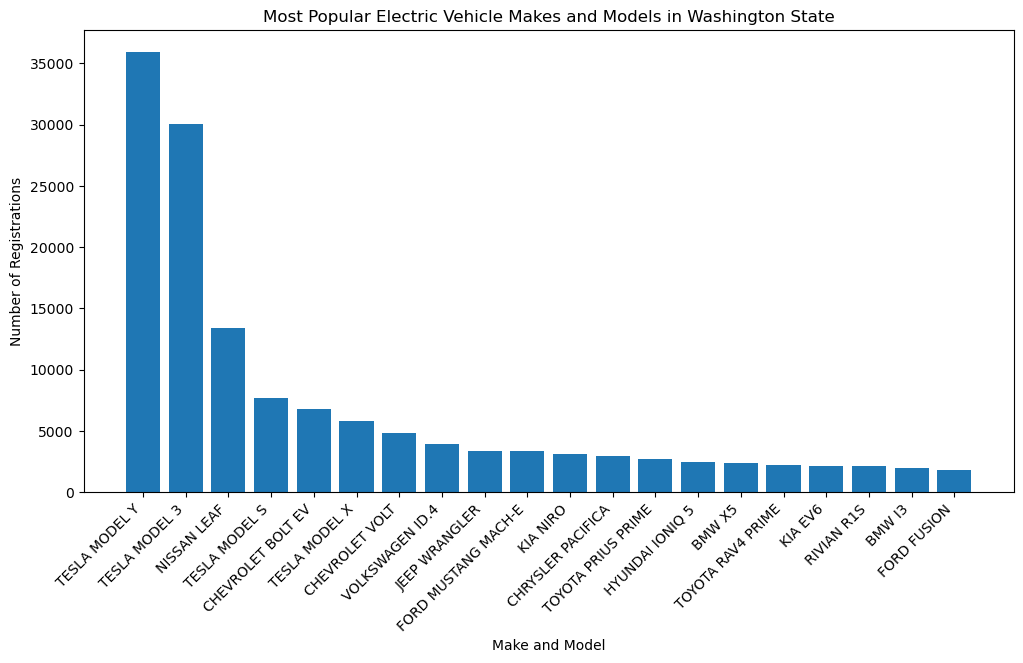

In [117]:
# Create visualizations, such as bar charts or tables, to illustrate the distribution of electric vehicle registrations across different makes and models.

x=popular_make_model.head(20)
plt.figure(figsize=(12, 6))
plt.bar(x['Make'] + ' ' + x['Model'], x['Registrations'])
plt.xlabel('Make and Model')
plt.ylabel('Number of Registrations')
plt.title('Most Popular Electric Vehicle Makes and Models in Washington State')
plt.xticks(rotation=45, ha='right')
plt.show()

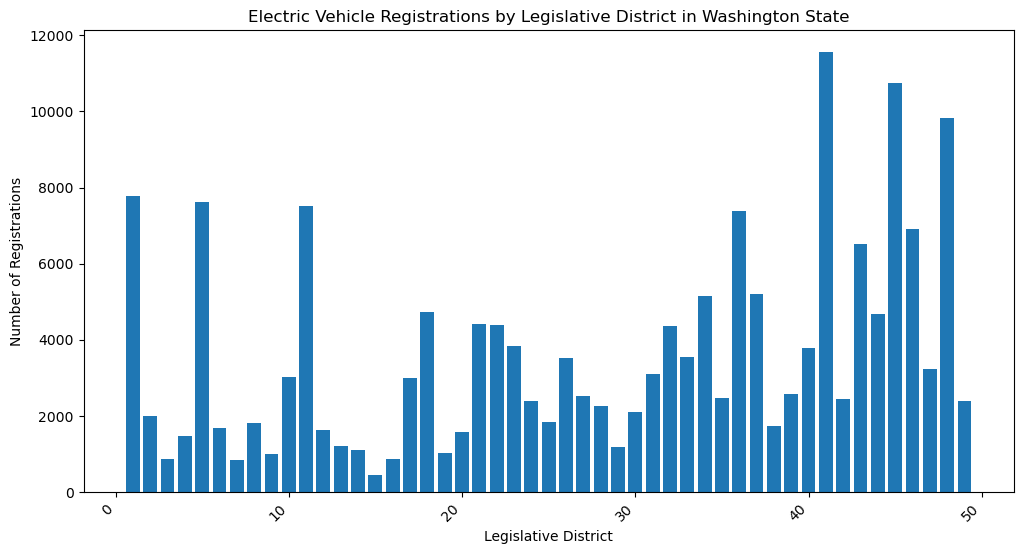

Correlation Coefficient: -0.05450737746270699


In [118]:
# Group by Legislative District
district_distribution = data.groupby('Legislative District').size().reset_index(name='Registrations')

# Sort by Registrations
popular_districts = district_distribution.sort_values(by='Registrations', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(popular_districts['Legislative District'], popular_districts['Registrations'])
plt.xlabel('Legislative District')
plt.ylabel('Number of Registrations')
plt.title('Electric Vehicle Registrations by Legislative District in Washington State')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate and display the correlation coefficient
correlation_coefficient = data['Legislative District'].corr( popular_districts['Registrations'])
print(f"Correlation Coefficient: {correlation_coefficient}")

In [119]:
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])

In [120]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Electric Vehicle Type'] = label_encoder.fit_transform(data['Electric Vehicle Type'])
data['Make'] = label_encoder.fit_transform(data['Make'])
data['Model'] = label_encoder.fit_transform(data['Model'])

In [123]:
# Drop irrelevant columns
data.drop("VIN (1-10)", axis=1, inplace=True)

In [124]:
data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']]

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP
0,98122.0,2020,34,81,291,0
1,98021.0,2023,34,81,0,0
2,98109.0,2019,34,79,270,0
3,98027.0,2016,34,79,210,0
4,98392.0,2021,34,81,0,0
...,...,...,...,...,...,...
177861,98391.0,2022,34,81,0,0
177862,98584.0,2023,15,75,0,0
177863,98848.0,2021,34,81,0,0
177864,98010.0,2021,37,68,0,0


In [125]:
print(data.columns[:0])

Index([], dtype='object')


In [126]:
#sns.set_theme(style="white")
 
X = data[['Postal Code', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']].values
y = data['Electric Vehicle Type'].values


# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [127]:
# count the occurrences of target value in the 'Electric Vehicle Type' column
data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
0    138947
1     38526
Name: count, dtype: int64

In [131]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Print Mean Squared Error and R2 Score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.10898777526999061
R2 Score: 0.3587395840498714


In [132]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Evaluate Decision Tree Regressor
print("Decision Tree Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 Score: {r2_score(y_test, y_pred_dt)}')

Decision Tree Regressor:
Mean Squared Error: 0.00016903948010968785
R2 Score: 0.9990054083858616


In [133]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 Score: {r2_score(y_test, y_pred_rf)}')


Random Forest Regressor:
Mean Squared Error: 8.258843535758691e-05
R2 Score: 0.9995140675706162


In [134]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Evaluate Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}')
print(f'R2 Score: {r2_score(y_test, y_pred_gb)}')


Gradient Boosting Regressor:
Mean Squared Error: 0.0008206290816419436
R2 Score: 0.9951715965856642


In [135]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'MAPE': mape
    }
    return results

In [136]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)
lr_results = evaluate_model(reg, X_test, y_test, y_pred_lr)

In [137]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
dt_results = evaluate_model(dt_reg, X_test, y_test, y_pred_dt)

In [138]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rf_results = evaluate_model(rf_reg, X_test, y_test, y_pred_rf)

In [139]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
gb_results = evaluate_model(gb_reg, X_test, y_test, y_pred_gb)
print("Gradient Boosting Regressor Results:", gb_results)

Gradient Boosting Regressor Results: {'MSE': 0.0008206290816419194, 'RMSE': 0.02864662426258842, 'R2 Score': 0.9951715965856643, 'MAPE': 15934025597948.828}


In [140]:
# Evaluation Summary
models_results = {
    'Linear Regression': lr_results,
    'Decision Tree Regressor': dt_results,
    'Random Forest Regressor': rf_results,
    'Gradient Boosting Regressor': gb_results
}

for model, results in models_results.items():
    print(f"\n{model} Evaluation:")
    for metric, value in results.items():
        print(f"{metric}: {value}")


Linear Regression Evaluation:
MSE: 0.10898777526999061
RMSE: 0.3301329660454869
R2 Score: 0.3587395840498714
MAPE: 566261228838889.5

Decision Tree Regressor Evaluation:
MSE: 0.00016903948010968785
RMSE: 0.013001518377085342
R2 Score: 0.9990054083858616
MAPE: 253762046544.29758

Random Forest Regressor Evaluation:
MSE: 8.950735060875082e-05
RMSE: 0.009460832447979978
R2 Score: 0.9994733581748984
MAPE: 301130961899.23315

Gradient Boosting Regressor Evaluation:
MSE: 0.0008206290816419194
RMSE: 0.02864662426258842
R2 Score: 0.9951715965856643
MAPE: 15934025597948.828


In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9002479245708276
ROC AUC Score: 0.836433869431756
Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.95      0.94     41684
           1       0.80      0.72      0.76     11558

    accuracy                           0.90     53242
   macro avg       0.86      0.84      0.85     53242
weighted avg       0.90      0.90      0.90     53242

Confusion Matrix:

 [[39567  2117]
 [ 3194  8364]]


In [148]:
from sklearn.linear_model import LogisticRegression
# initialize the Logistic Regression classifier and fit it to the resampled training data
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.8456857368243116
ROC AUC Score: 0.7087936388180461
Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.91     41684
           1       0.72      0.47      0.57     11558

    accuracy                           0.85     53242
   macro avg       0.79      0.71      0.74     53242
weighted avg       0.83      0.85      0.83     53242

Confusion Matrix:

 [[39630  2054]
 [ 6162  5396]]


In [149]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9998309605198903
ROC AUC Score: 0.9997044544921814
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41684
           1       1.00      1.00      1.00     11558

    accuracy                           1.00     53242
   macro avg       1.00      1.00      1.00     53242
weighted avg       1.00      1.00      1.00     53242

Confusion Matrix:

 [[41681     3]
 [    6 11552]]
